# Propensity Score Matching

Propensity score matching is a non-experimental causal inference technique. It is used when a group of subjects receive a treatment and we'd like to compare their outcomes with the outcomes of a control group. Examples include estimating the effects of a training program on job performance. It enable us to make conclusions about causal relationship from an observational data. 

__Reference__

- https://towardsdatascience.com/propensity-score-matching-a0d373863eec
- https://towardsdatascience.com/psmpy-propensity-score-matching-in-python-a3e0cd4d2631

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
# set the figure shape and size of outputs (optional)
sns.set(rc={'figure.figsize':(8,8)}, font_scale = 1.3)

In [2]:
dataset = pd.read_excel(r'D:\Projects\python-materials-acg7848\datasets\restatements.xlsx')

__logistic_ps__ function performs logistic regression to estimate propensity scores for propensity score matching. This function is specifically designed for use with binary treatment variables (0/1), and it automatically balances the distribution of covariates between treated and control groups by adjusting the intercept and coefficients of the logistic regression model.

- __treatment:__ The name of the column containing the treatment assignment (binary 0/1).
- __indx:__ The name of the index column. The default is 'gvkey'.
- __exclude:__ A list of column names to exclude from the analysis. 
- __balance:__ It is used to indicate that the matching algorithm should attempt to balance the distribution of covariates between the treated and control groups. This is achieved by selecting control individuals with propensity scores that are similar to those of the treated individuals, based on a specified metric such as the absolute standardized difference or the mean difference. The default is True.

In [3]:
psm = PsmPy(dataset, treatment='restatement', indx='gvkey', exclude = ['at', 'ceq', 'csho', 'ni', 'sale','sich', 'prcc_f'])
psm.logistic_ps(balance = True)

__knn_matched()__ is a function in the psmpy Python library that performs propensity score matching using k-nearest neighbor (k-NN) matching. It matches each treated individual with k nearest untreated individuals based on the estimated propensity scores.


- __matcher:__ The method to use for calculating propensity scores. The default is 'propensity_logit', which uses logistic regression to estimate propensity scores. Other options are 'propensity_rpart' for using decision trees and 'propensity_bart' for using Bayesian additive regression trees.
- __replacement:__ Whether to allow replacement of matched controls. If True, the same control may be matched to multiple treated individuals. If False, each control is matched to at most one treated individual. The default is False.
- __caliper:__ The maximum allowable distance (or difference) between the propensity scores of a treated individual and its matched controls. This is used to exclude controls that are too dissimilar from the treated individual in terms of propensity scores. The default is None, which means no caliper is used.

The result of this function contains matched treated and control individuals that have similar propensity scores and are within the specified caliper. You can use this matched data frame for further analysis, such as estimating treatment effects or conducting hypothesis tests.

There are also other ways to perform matching across the treatment group having similar propensity scores like using __match()__ function.


In [5]:
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\Users\saisr\anaconda3\lib\site-packages\psmpy\psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


The predicted data contains the values of propensity logit and propensity score. The propensity score is the conditional probability of receiving treatment given a set of covariates, while the propensity logit is the natural logarithm of the odds of receiving treatment given the same set of covariates.

In [6]:
psm.predicted_data

,gvkey,fyear,roa,size,mtb,sic2,propensity_score,propensity_logit,restatement
0,1004,2010,0.040984,6.956375,1.255999,50,0.528539,0.114280,0
1,1004,2010,0.040984,6.956375,1.255999,50,0.528539,0.114280,0
2,1004,2010,0.040984,6.956375,1.255999,50,0.528539,0.114280,0
3,1004,2010,0.040984,6.956375,1.255999,50,0.528539,0.114280,0
4,1004,2010,0.040984,6.956375,1.255999,50,0.528539,0.114280,1
...,...,...,...,...,...,...,...,...,...
50072,326688,2018,0.050695,8.289150,1.481319,34,0.569633,0.280353,0
50073,327451,2018,-0.046110,4.778782,0.406694,44,0.451620,-0.194127,0
50074,328032,2018,0.030711,4.584217,0.536663,44,0.462251,-0.151283,0
50075,328692,2018,-0.008641,2.946730,0.376742,13,0.417587,-0.332685,0


The function plots two histograms, one for the treated group and one for the control group, with the density of each group represented by a line. The vertical lines indicate the mean propensity score for each group before and after matching, and the legend shows the labels for the treated and control groups.

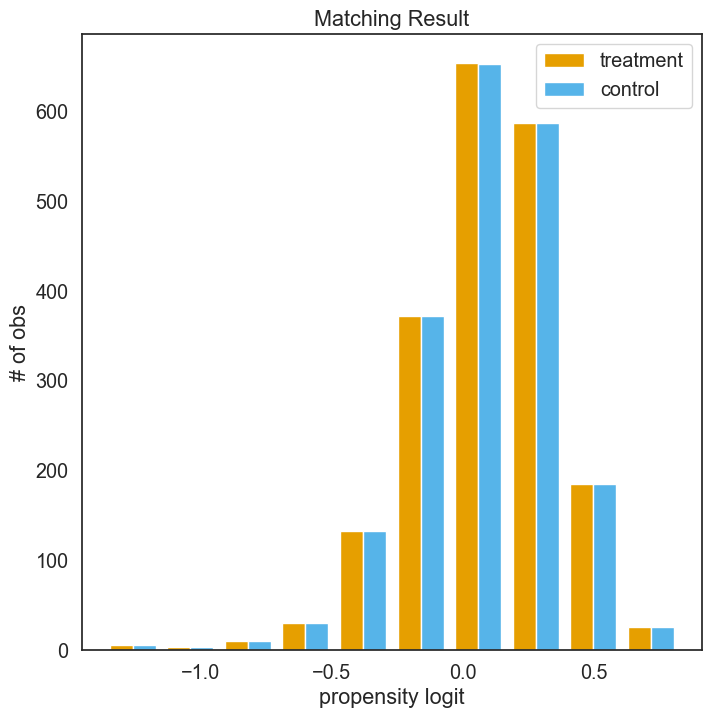

In [7]:
# plot the distribution of propensity scores before and after matching
psm.plot_match(Title='Matching Result', Ylabel='# of obs', Xlabel= 'propensity logit', names = ['treatment', 'control'])

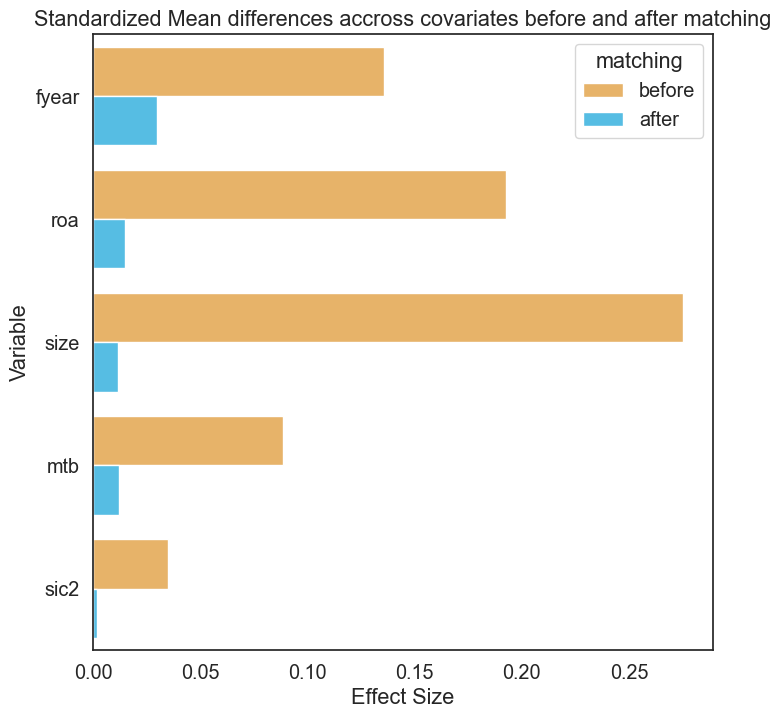

In [8]:
psm.effect_size_plot()

The effect size measures the standardized difference in means between the treated and control groups, and is a useful metric for evaluating the success of a matching algorithm in achieving balance between the two groups. Ideally, ‘after’ matching the effect size exerted by the variable should be smaller than the before. The closer these effect sizes are to 0 the less our outcomes of interest will depend on that covariate.

In [9]:
psm.effect_size

,Variable,matching,Effect Size
0,fyear,before,0.135724
1,fyear,after,0.029768
2,roa,before,0.192505
3,roa,after,0.014766
4,size,before,0.275472
5,size,after,0.011698
6,mtb,before,0.088619
7,mtb,after,0.012235
8,sic2,before,0.035181
9,sic2,after,0.001681


In [21]:
#  returns a dataframe of indicies from the minor class and their associated matched index from the major class psm.
psm.matched_ids

,gvkey,matched_ID
0,1004,1004
1,1210,1210
2,1254,1254
3,1254,1254
4,1254,1254
...,...,...
2000,178976,178976
2001,179288,179288
2002,180405,180405
2003,184101,184101
